<img src="img/viu_logo.png" width="200">

## 04EPPY - Ciencia de Datos e Inteligencia Artificial
### Deep Learning

![logo](img/python_logo.png)

*Òscar Garibo*

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
import numpy as np

In [3]:
np.__version__

'1.23.3'

In [4]:
tf.keras.__version__

'2.10.0'

## Sequential

In [4]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))       # capa oculta de 10 nodos, con 8 entradas
model.add(Dense(1))                          # capa de salida de 1 nodo

In [5]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

## Functional

In [6]:
# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(100)(x_in)
x = Dense(80)(x)
x = Dense(30)(x)
x = Dense(10)(x)
x = Dense(5)(x)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

## MLP para Clasificación Binaria

In [8]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import set_printoptions

In [9]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]

(235, 34) (116, 34) (235,) (116,)


In [11]:
n_features

34

In [12]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 [==============================] - 2s 4ms/step - loss: 0.6339 - accuracy: 0.6766
Epoch 2/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6169 - accuracy: 0.6809
Epoch 3/150
8/8 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.6851
Epoch 4/150
8/8 [==============================] - 0s 5ms/step - loss: 0.5913 - accuracy: 0.6936
Epoch 5/150
8/8 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.6894
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 0.5723 - accuracy: 0.6979
Epoch 7/150
8/8 [==============================] - 0s 5ms/step - loss: 0.5633 - accuracy: 0.6979
Epoch 8/150
8/8 [==============================] - 0s 4ms/step - loss: 0.5545 - accuracy: 0.7149
Epoch 9/150
8/8 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7277
Epoch 10/150
8/8 [==============================] - 0s 5ms/step - loss: 0.5368 - accuracy: 0.7362
Epoch 11/150
8/8 [===========

In [13]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
y_pred = model.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred}')

Test Accuracy: 0.922
1/1 [==============================] - 0s 199ms/step
Predicted: [[0.996]]


## MLP para Clasificación Multiclase

In [7]:
# mlp for multiclass classification
from numpy import set_printoptions
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')

In [9]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]

(100, 4) (50, 4) (100,) (50,)


In [12]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)


Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 12.4205 - accuracy: 0.3700
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 11.8758 - accuracy: 0.3700
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 11.3627 - accuracy: 0.3700
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 10.8391 - accuracy: 0.3700
Epoch 5/150
4/4 [==============================] - 0s 6ms/step - loss: 10.3697 - accuracy: 0.3700
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 9.9174 - accuracy: 0.3700
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 9.4667 - accuracy: 0.3700
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 9.0643 - accuracy: 0.3700
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 8.6714 - accuracy: 0.3700
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 8.2993 - accuracy: 0.3700
Epoch 11/150
4/4 [======

In [13]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')
# make a prediction
row = [5.1,3.5,1.4,0.2]
y_pred = model.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred} (class={argmax(y_pred)})')

Test Accuracy: 0.980
1/1 [==============================] - 0s 256ms/step
Predicted: [[9.993e-01 6.825e-04 1.683e-05]] (class=0)


## MLP para Regresión

In [14]:
# mlp for regression
from numpy import set_printoptions
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]

(339, 13) (167, 13) (339,) (167,)


In [16]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [18]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
11/11 [==============================] - 1s 2ms/step - loss: 1297.0729
Epoch 2/150
11/11 [==============================] - 0s 3ms/step - loss: 555.3251
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 311.0753
Epoch 4/150
11/11 [==============================] - 0s 3ms/step - loss: 158.9550
Epoch 5/150
11/11 [==============================] - 0s 4ms/step - loss: 111.4162
Epoch 6/150
11/11 [==============================] - 0s 3ms/step - loss: 99.2203
Epoch 7/150
11/11 [==============================] - 0s 3ms/step - loss: 93.2856
Epoch 8/150
11/11 [==============================] - 0s 3ms/step - loss: 88.7905
Epoch 9/150
11/11 [==============================] - 0s 3ms/step - loss: 85.9585
Epoch 10/150
11/11 [==============================] - 0s 2ms/step - loss: 83.0934
Epoch 11/150
11/11 [==============================] - 0s 3ms/step - loss: 81.2581
Epoch 12/150
11/11 [==============================] - 0s 4ms/step - loss: 78.9286
Epoch 13/150
11/11 

In [19]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
y_pred = model.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred}')

MSE: 32.639, RMSE: 5.713
1/1 [==============================] - 0s 105ms/step
Predicted: [[28.833]]


## CNN Redes Convolucionales

11490434/11490434 [==============================] - 4s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


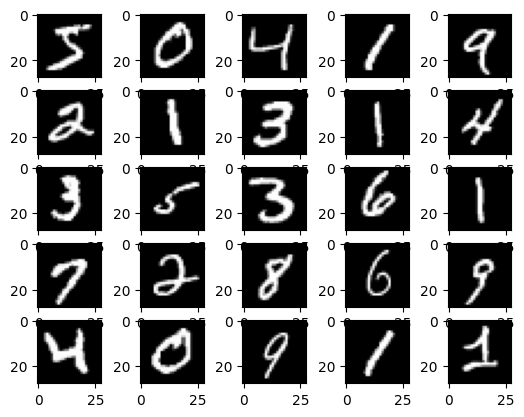

In [25]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print(f'Train: X={trainX.shape}, y={trainy.shape}')
print(f'Test: X={testX.shape}, y={testy.shape}')
# plot first few images
fig, ax = plt.subplots(5, 5)
ax = ax.flatten()
for i in range(25):
	# plot raw pixel data
	ax[i].imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()
fig.savefig('here.png')

In [1]:
# example of a cnn for image classification
from numpy import set_printoptions
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

(28, 28, 1) 10


In [3]:
in_shape

(28, 28, 1)

In [30]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

In [31]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {acc:.3f}')
# make a prediction
image = x_train[0]
y_pred = model.predict(asarray([image]))
set_printoptions(precision=3)
print(f'Predicted: class={argmax(y_pred)}')

Accuracy: 0.986
1/1 [==============================] - 0s 158ms/step
Predicted: class=5


In [32]:
image = x_train[15]
y_pred = model.predict(asarray([image]))
set_printoptions(precision=3)
print(f'Predicted: class={argmax(y_pred)}')

1/1 [==============================] - 0s 67ms/step
Predicted: class=7


## RNN Redes Recurrentes, Long Short-Term Memory LSTM y GRU

In [3]:
# lstm for time series forecasting
from numpy import set_printoptions
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [1]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

In [12]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11928\3879323613.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = read_csv(path, header=0, index_col=0, squeeze=True)


(91, 5, 1) (12, 5, 1) (91,) (12,)


In [25]:
X_train.shape[1:]

(5, 1)

In [26]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/350
3/3 [==============================] - 3s 245ms/step - loss: 118934048.0000 - mae: 9529.8809 - val_loss: 74366920.0000 - val_mae: 7393.0312
Epoch 2/350
3/3 [==============================] - 0s 41ms/step - loss: 39342872.0000 - mae: 5182.5981 - val_loss: 37622436.0000 - val_mae: 4876.6099
Epoch 3/350
3/3 [==============================] - 0s 49ms/step - loss: 28844816.0000 - mae: 4174.1084 - val_loss: 29469918.0000 - val_mae: 4169.8354
Epoch 4/350
3/3 [==============================] - 0s 47ms/step - loss: 29823418.0000 - mae: 4062.6663 - val_loss: 23397138.0000 - val_mae: 3603.8147
Epoch 5/350
3/3 [==============================] - 0s 41ms/step - loss: 27061602.0000 - mae: 4051.3640 - val_loss: 13369928.0000 - val_mae: 3183.1921
Epoch 6/350
3/3 [==============================] - 0s 89ms/step - loss: 14507068.0000 - mae: 3063.8435 - val_loss: 10128680.0000 - val_mae: 2599.6482
Epoch 7/350
3/3 [==============================] - 0s 40ms/step - loss: 13582119.0000 - mae: 2828.

In [29]:
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'MSE: {mse:.3f}, RMSE: {sqrt(mse):.3f}, MAE: {mae:.3f}')
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
y_pred = model.predict(row)
set_printoptions(precision=3)
print(f'Predicted: {y_pred}')

MSE: 13816120.000, RMSE: 3717.004, MAE: 2899.913
1/1 [==============================] - 0s 73ms/step
Predicted: [[17311.594]]


## Visualize Models

In [15]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# define model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', name='capa1'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                180       
                                                                 
 capa1 (Dense)               (None, 8)                 168       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [30]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [31]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,), name='conv1'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', name='Dense1'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizar Curvas de Aprendizaje

In [3]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [4]:
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]

In [5]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
epochs = 300
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X, y, epochs=epochs, batch_size=32, verbose=0, validation_split=0.3)

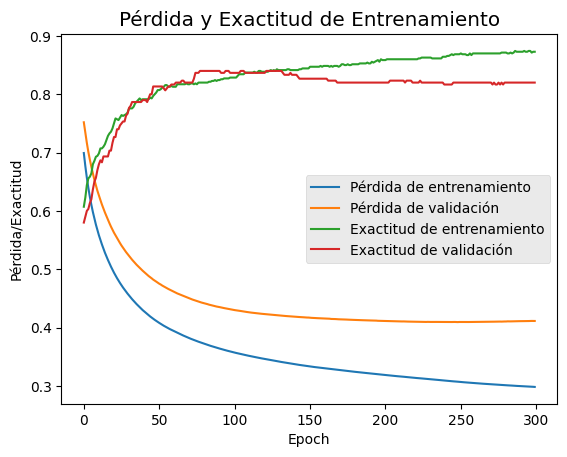

In [6]:
fig,ax = plt.subplots()
plt.style.use('ggplot')

epoch_values = list(range(epochs))
ax.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
ax.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')
ax.plot(epoch_values, history.history['accuracy'], label='Exactitud de entrenamiento')
ax.plot(epoch_values, history.history['val_accuracy'], label='Exactitud de validación')

ax.set_title('Pérdida y Exactitud de Entrenamiento')
ax.set_xlabel('Epoch')
ax.set_ylabel('Pérdida/Exactitud')
ax.legend()
plt.show()
fig.savefig('here.png')

## Guardar y cargar un modelo

In [7]:
# example of saving a fit model
from numpy import set_printoptions
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

In [8]:
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]

In [9]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# save model to file
model.save('res/model.h5')

In [10]:
# load the model from file
model2 = load_model('res/model.h5')
# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
y_pred = model2.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred[0]}')

1/1 [==============================] - 0s 242ms/step
Predicted: [0.819]


## Dropout

In [11]:
# example of using dropout
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [12]:
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]

In [13]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

## Normalización de Batches

In [14]:
# example of using batch normalization
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [15]:
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]

In [16]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

## Early Stopping

In [17]:
# example of using early stopping
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [18]:
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]

In [19]:
# define model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)
## ModelCheckpoint mc=ModelCheckpoint(monitor='val_loss',save_best=True)
# fit the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=1, validation_split=0.3, callbacks=[es])

Epoch 1/200
22/22 [==============================] - 2s 31ms/step - loss: 1.1656 - val_loss: 0.8525
Epoch 2/200
22/22 [==============================] - 0s 13ms/step - loss: 0.9740 - val_loss: 0.7605
Epoch 3/200
22/22 [==============================] - 0s 8ms/step - loss: 0.8585 - val_loss: 0.7052
Epoch 4/200
22/22 [==============================] - 0s 8ms/step - loss: 0.8282 - val_loss: 0.6685
Epoch 5/200
22/22 [==============================] - 0s 9ms/step - loss: 0.7639 - val_loss: 0.6413
Epoch 6/200
22/22 [==============================] - 0s 12ms/step - loss: 0.7676 - val_loss: 0.6221
Epoch 7/200
22/22 [==============================] - 0s 11ms/step - loss: 0.7116 - val_loss: 0.6072
Epoch 8/200
22/22 [==============================] - 0s 10ms/step - loss: 0.6609 - val_loss: 0.5951
Epoch 9/200
22/22 [==============================] - 0s 11ms/step - loss: 0.6665 - val_loss: 0.5831
Epoch 10/200
22/22 [==============================] - 0s 10ms/step - loss: 0.6928 - val_loss: 0.5726
Ep

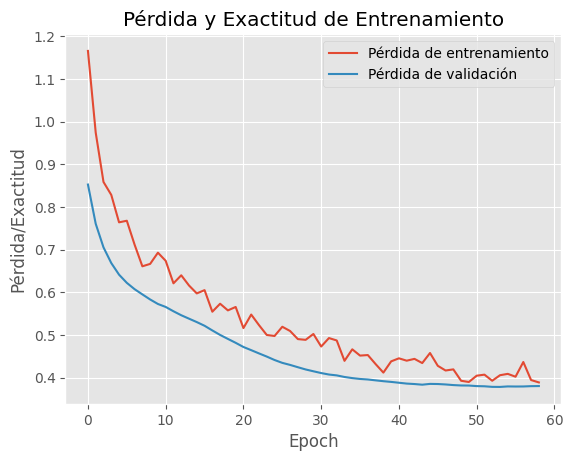

In [20]:
fig,ax = plt.subplots()
plt.style.use('ggplot')

epoch_values = list(range(len(history.history['loss'])))
ax.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
ax.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')

ax.set_title('Pérdida y Exactitud de Entrenamiento')
ax.set_xlabel('Epoch')
ax.set_ylabel('Pérdida/Exactitud')
ax.legend()
plt.show()
fig.savefig('here.png')

In [ ]:
fig,ax = plt.subplots()
plt.style.use('ggplot')

epoch_values = list(range(len(history.history['loss'])))
ax.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
ax.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')

ax.set_title('Pérdida y Exactitud de Entrenamiento')
ax.set_xlabel('Epoch')
ax.set_ylabel('Pérdida/Exactitud')
ax.legend()
plt.show()
fig.savefig('here.png')

In [ ]:
fig,ax = plt.subplots()
plt.style.use('ggplot')

epoch_values = list(range(len(history.history['loss'])))
ax.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
ax.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')

ax.set_title('Pérdida y Exactitud de Entrenamiento')
ax.set_xlabel('Epoch')
ax.set_ylabel('Pérdida/Exactitud')
ax.legend()
plt.show()
fig.savefig('here.png')

In [ ]:
fig,ax = plt.subplots()
plt.style.use('ggplot')

epoch_values = list(range(len(history.history['loss'])))
ax.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
ax.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')

ax.set_title('Pérdida y Exactitud de Entrenamiento')
ax.set_xlabel('Epoch')
ax.set_ylabel('Pérdida/Exactitud')
ax.legend()
plt.show()
fig.savefig('here.png')